In [1]:
from __future__ import print_function
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import os

In [2]:
num_classes = 6
img_rows, img_cols = 224, 224
batch_size = 32

train_data_dir = 'C:\\Users\\ryana\\SuperPalmOil45\\dataset_45\\training'
validation_data_dir = 'C:\\Users\\ryana\\SuperPalmOil45\\dataset_45\\validation'
testing_data_dir = 'C:\\Users\\ryana\\SuperPalmOil45\\dataset_45\\testing'

In [3]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        testing_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 3384 images belonging to 6 classes.
Found 584 images belonging to 6 classes.
Found 139 images belonging to 6 classes.


In [4]:
model = Sequential()

# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape= (224, 224, 3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 111, 111, 64)      1

In [5]:
opt = SGD(lr=1e-2)
model.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [6]:
callback=tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                          min_delta=0.01,
                                          patience=6,
                                          verbose=1,
                                          mode='auto',
                                          restore_best_weights=True)

In [7]:
history = model.fit(x=train_generator, 
                 validation_data=validation_generator,
                 epochs=200,
                 verbose=1,
                 callbacks=[callback])

Epoch 1/200
106/106 [==============================] - 430s 4s/step - loss: 1.7508 - accuracy: 0.2290 - val_loss: 1.7648 - val_accuracy: 0.3082
Epoch 2/200
106/106 [==============================] - 454s 4s/step - loss: 1.6595 - accuracy: 0.3233 - val_loss: 1.7414 - val_accuracy: 0.2551
Epoch 3/200
106/106 [==============================] - 449s 4s/step - loss: 1.5474 - accuracy: 0.3768 - val_loss: 1.5656 - val_accuracy: 0.3630
Epoch 4/200
106/106 [==============================] - 442s 4s/step - loss: 1.3875 - accuracy: 0.4613 - val_loss: 1.4229 - val_accuracy: 0.3682
Epoch 5/200
106/106 [==============================] - 442s 4s/step - loss: 1.2535 - accuracy: 0.5251 - val_loss: 1.3009 - val_accuracy: 0.4503
Epoch 6/200
106/106 [==============================] - 443s 4s/step - loss: 1.1202 - accuracy: 0.5783 - val_loss: 1.4905 - val_accuracy: 0.3784
Epoch 7/200
106/106 [==============================] - 441s 4s/step - loss: 1.0259 - accuracy: 0.6155 - val_loss: 1.3232 - val_accuracy:

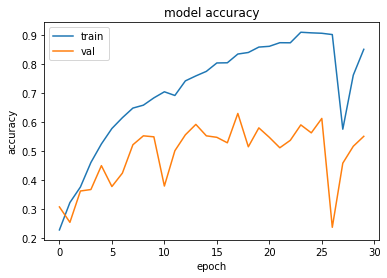

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

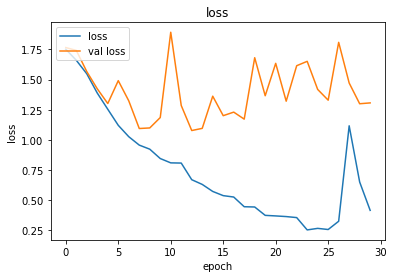

In [10]:
acc = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val loss'], loc='upper left')
plt.show()

In [11]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import seaborn as sns
import pandas as pd

In [12]:
# ambil label true kelas di data training
y_true = test_generator.classes

# ambil label hasil prediksi (index maksimum, secara kolom)
y_pred = np.argmax(model.predict(test_generator), axis=-1)

# performa model di 
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82        22
           1       0.53      0.74      0.62        23
           2       0.64      0.88      0.74        26
           3       1.00      0.25      0.40        24
           4       0.65      0.57      0.60        23
           5       0.31      0.24      0.27        21

    accuracy                           0.61       139
   macro avg       0.64      0.61      0.58       139
weighted avg       0.65      0.61      0.58       139



In [13]:
cm = pd.DataFrame(confusion_matrix(y_true, y_pred)).rename_axis('Actual').rename_axis('Predicted', axis=1)
cm

Predicted,0,1,2,3,4,5
Actual,,,,,,
0,21,1,0,0,0,0
1,1,17,1,0,0,4
2,0,2,23,0,0,1
3,0,3,9,6,6,0
4,2,1,1,0,13,6
5,5,8,2,0,1,5


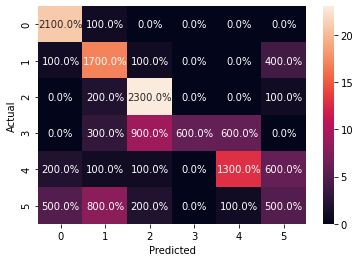

In [14]:
sns.heatmap(cm, annot=True, fmt=".1%")